# Testing critic functionallity

In [1]:
%matplotlib inline

import sys
import os
from pathlib import Path

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

SCRIPT_DIR = Path(os.path.dirname(os.path.realpath("__file__")))
sys.path.append(str(SCRIPT_DIR.parent))


from critic import CriticConfig, critic_feed_forward_model_constructor

In [2]:
# Tensorflow debug settings
tf.config.run_functions_eagerly(True)
tf.random.set_seed(0)

## Create critic model

In [3]:
sample_config = {
    "layer_sizes": [40, 40],
    "learning_rate": 0.0001,
    "hidden_activation": "relu",
    "output_activation": "linear"
}
model_config = CriticConfig(**sample_config)
critic_constructor = critic_feed_forward_model_constructor(3)
model = critic_constructor(model_config)

## Test

We will train with 3 states that yield 3 different discounted rewards.
If the model learns to predict them, it's training functionality is working.

In [4]:
state = np.array([[1., 0., 0.], [0., 1., 0.], [0., 0., 1.]])
discounted_rewards = np.array([[0.5], [1.], [1.]])

In [5]:
losses = []
values_list = []
for i in range(1000):
    
    values, loss, gradients = model.train_step(state, discounted_rewards)
    losses.append(loss)
    values_list.append(values)
    if not i % 200:
        
        print("")
        print(f"Episode {i}")
        print(f"Values = {values.numpy()}")
        print(f"loss = {loss.numpy()}")

    
        


Episode 0
Values = [[ 0.12403196]
 [ 0.2086613 ]
 [-0.0365605 ]]
loss = 0.6140088438987732

Episode 200
Values = [[0.49198723]
 [0.7099694 ]
 [0.40801305]]
loss = 0.14487683773040771

Episode 400
Values = [[0.55048996]
 [0.96405905]
 [0.71972567]]
loss = 0.02746489644050598

Episode 600
Values = [[0.519827 ]
 [1.0116904]
 [0.9061307]]
loss = 0.003113741986453533

Episode 800
Values = [[0.5040419 ]
 [1.0049273 ]
 [0.97896373]]
loss = 0.0001610465405974537


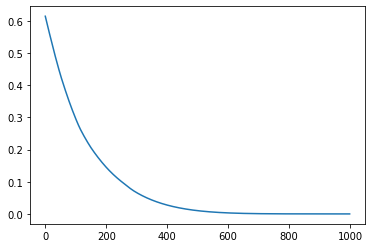

In [6]:
steps = list(range(1000))

plt.plot(steps, losses)

## Final model predictions

In [7]:
final_values = model(state)
final_values

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.5005814 ],
       [1.0008628 ],
       [0.99679923]], dtype=float32)>